# 

## General Information

✅ Goal: Using AI and ML, help the bank identify customers with highest potential to accept term deposit hours


### Models to be used:
- **Logistic Regression**: Logistic regression is a popular model for binary classification tasks. It models the probability that a given input belongs to a certain class (0 or 1) using the logistic function.

- **Decision Trees**: Decision trees can be used for binary classification by splitting the feature space into regions based on the input features. Each region corresponds to a predicted class label (0 or 1).

- **Random Forest**: Random forest is an ensemble learning technique that consists of multiple decision trees. It can be used for binary classification tasks by aggregating the predictions of multiple decision trees.

- **Support Vector Machines (SVM)**: SVM is a powerful algorithm for binary classification tasks. It works by finding the hyperplane that best separates the data points of different classes in the feature space.

- **Gradient Boosting Machines (GBM)**: GBM is an ensemble learning technique that builds multiple weak learners sequentially to improve predictive performance. It can be used for binary classification tasks and is known for its high accuracy.


## Library Import






In [5]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


## Data Import



In [6]:
#Assign data to a dataframe
df = pd.read_csv('bank-additional-full.csv', sep= ";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Data Exploration and Cleaning

<Axes: >

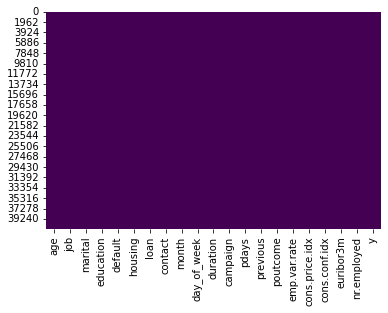

In [7]:
#Check for Null Values
sns.heatmap(df.isnull(), cmap = "viridis", cbar = False)

In [8]:
unique_values_dict = {}

# Iterate through columns in the DataFrame
for column in df.columns:
    # Check if the column dtype is 'object'
    if df[column].dtype == 'object':
        # Get unique values for each object column
        unique_values = df[column].unique().tolist()
        # Store unique values in the dictionary
        unique_values_dict[column] = unique_values

print(unique_values_dict)


{'job': ['housemaid', 'services', 'admin.', 'blue-collar', 'technician', 'retired', 'management', 'unemployed', 'self-employed', 'unknown', 'entrepreneur', 'student'], 'marital': ['married', 'single', 'divorced', 'unknown'], 'education': ['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown', 'university.degree', 'illiterate'], 'default': ['no', 'unknown', 'yes'], 'housing': ['no', 'yes', 'unknown'], 'loan': ['no', 'yes', 'unknown'], 'contact': ['telephone', 'cellular'], 'month': ['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep'], 'day_of_week': ['mon', 'tue', 'wed', 'thu', 'fri'], 'poutcome': ['nonexistent', 'failure', 'success'], 'y': ['no', 'yes']}


**The color purple denotes instances of non-null data, and since purple is the only color being shown, THERE IS NO MISSING DATA**

**The High Quantity of Object datatypes shows that we're gonna have to create dummy variables at some point**

## Dummy Variable Creation

In [10]:
df_dummy = df_drop.copy()

# Iterate through columns in the DataFrame
for column in df_drop.columns:
    # Check if the column dtype is 'object'
    if df_drop[column].dtype == 'object':
        # Create dummy variables for the object column with drop_first=True
        dummy_columns = pd.get_dummies(df_drop[column], prefix=column, drop_first=True, dtype = "float")
        # Concatenate the dummy columns to the new DataFrame
        df_dummy = pd.concat([df_dummy, dummy_columns], axis=1)
        # Drop the original object column from the new DataFrame
        df_dummy.drop(column, axis=1, inplace=True)

In [11]:
df_dummy

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [12]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  job_blue-collar                41188 non-null  float64
 11  job_entrepreneur               41188 non-null  float64
 12  job_housemaid                  41188 non-null 

In [13]:
#if 999 then irrelevent

#999 = month and day of the week = irrelevent (turn them into null values)

## Scoring Mechanism Building (Logistic Regression)


**Note**: Score for a True negative is going to be 0, not 50

During evaluation of the models, please use the following parameters: <br>
✅  For each incorrect prediction, the scoring mechanism would penalize the model by 3 units. <br>
✅ For each correct prediction, the scoring mechanism would reward the model by 50 units.

### Step 1: Train Test Split (Use 70% as training data)

In [15]:
X = df_dummy.drop("y_yes", axis=1)
y = df_dummy["y_yes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (28831, 55)
Shape of X_test: (12357, 55)
Shape of y_train: (28831,)
Shape of y_test: (12357,)


### Step 2: Create Logistic Regression Model

In [16]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Initialize the logistic regression model
logistic_model = LogisticRegression()

# Fit the model to the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = logistic_model.predict(X_test)

# Create DataFrame with true labels and predictions
logit_results_df = pd.DataFrame({'True Labels': y_test, 'Predictions': predictions})



/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/var/folders/v0/7r3ppc5x19s0nmby4drzy0wc0000gn/T/ipykernel_35968/146963579.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_data, x='Labels', y='Count', palette='pastel')


Text(0, 0.5, 'Count')

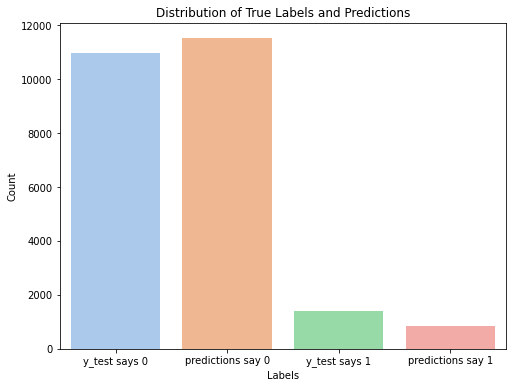

In [17]:
y_test_counts = logit_results_df['True Labels'].value_counts()
predictions_counts = logit_results_df['Predictions'].value_counts()

# Create DataFrame for plotting
plot_data = pd.DataFrame({
    'Labels': ['y_test says 0', 'predictions say 0', 'y_test says 1', 'predictions say 1'],
    'Count': [y_test_counts.get(0, 0), predictions_counts.get(0, 0),
              y_test_counts.get(1, 0), predictions_counts.get(1, 0)]
})

# Create the barplot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=plot_data, x='Labels', y='Count', palette='pastel')

# Add labels
plt.title('Distribution of True Labels and Predictions')
plt.xlabel('Labels')
plt.ylabel('Count')

In [18]:
logit_results_df.head(30)

,True Labels,Predictions
32884,0.0,0.0
3169,0.0,0.0
32206,0.0,0.0
9403,0.0,0.0
14020,0.0,0.0
17201,0.0,0.0
879,0.0,0.0
23757,0.0,0.0
10821,0.0,0.0
14355,0.0,0.0


In [19]:
# Initialize an empty list to store scores
scores = []

# Iterate over each row in the DataFrame
for index, row in logit_results_df.iterrows():
    # Check if the prediction is correct
    if row['True Labels'] == 1 and row['Predictions'] == 1:
        # If correct, reward the model by 50 units
        score = 50
    elif row['True Labels'] == 0 and row['Predictions'] == 0:
        # If incorrect, penalize the model by 3 units
        score = 0
    else:
      score = -3

    # Append the score to the list
    scores.append(score)

# Add the scores list as a new column to the DataFrame
logit_results_df['Score'] = scores

# Display the updated DataFrame
logit_results_df


,True Labels,Predictions,Score
32884,0.0,0.0,0
3169,0.0,0.0,0
32206,0.0,0.0,0
9403,0.0,0.0,0
14020,0.0,0.0,0
...,...,...,...
15908,0.0,0.0,0
28222,0.0,1.0,-3
14194,0.0,0.0,0
19764,0.0,0.0,0


In [20]:
# prompt: sum up the score column

logit_score = logit_results_df['Score'].sum()


In [21]:
#if willing to deposit and hit 50
#if willing to deposit and doen't hit 50 = NO


## Scoring Mechanism Building (SVM)

In [22]:

from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC()

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = svm_model.predict(X_test)


In [23]:
predictions

array([0., 0., 0., ..., 0., 0., 0.])

In [24]:

svm_results_df = pd.DataFrame({'True Labels': y_test, 'Predictions': predictions})
svm_results_df.head(5)


,True Labels,Predictions
32884,0.0,0.0
3169,0.0,0.0
32206,0.0,0.0
9403,0.0,0.0
14020,0.0,0.0


In [25]:
scores = []

# Iterate over each row in the DataFrame
for index, row in svm_results_df.iterrows():
    # Check if the prediction is correct
    if row['True Labels'] == 1 and row['Predictions'] == 1:
        # If correct, reward the model by 50 units
        score = 50
    elif row['True Labels'] == 0 and row['Predictions'] == 0:
        # If incorrect, penalize the model by 3 units
        score = 0
    else:
      score = -3

    # Append the score to the list
    scores.append(score)

# Add the scores list as a new column to the DataFrame
svm_results_df['Score'] = scores

# Display the updated DataFrame
svm_results_df


,True Labels,Predictions,Score
32884,0.0,0.0,0
3169,0.0,0.0,0
32206,0.0,0.0,0
9403,0.0,0.0,0
14020,0.0,0.0,0
...,...,...,...
15908,0.0,0.0,0
28222,0.0,1.0,-3
14194,0.0,0.0,0
19764,0.0,0.0,0


In [26]:
svm_score = svm_results_df['Score'].sum()


## Scoring Mechanism Building (Gradient Boosting Machines)

In [27]:


from sklearn.ensemble import GradientBoostingClassifier

# Initialize the GBM model
gbm_model = GradientBoostingClassifier()

# Fit the model to the training data
gbm_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = gbm_model.predict(X_test)

# Create DataFrame with true labels and predictions
gbm_results_df = pd.DataFrame({'True Labels': y_test, 'Predictions': predictions})

gbm_results_df.head()


,True Labels,Predictions
32884,0.0,0.0
3169,0.0,0.0
32206,0.0,0.0
9403,0.0,0.0
14020,0.0,0.0


In [28]:
scores = []

# Iterate over each row in the DataFrame
for index, row in gbm_results_df.iterrows():
    # Check if the prediction is correct
    if row['True Labels'] == 1 and row['Predictions'] == 1:
        # If correct, reward the model by 50 units
        score = 50
    elif row['True Labels'] == 0 and row['Predictions'] == 0:
        # If incorrect, penalize the model by 3 units
        score = 0
    else:
      score = -3

    # Append the score to the list
    scores.append(score)

# Add the scores list as a new column to the DataFrame
gbm_results_df['Score'] = scores

# Display the updated DataFrame
gbm_results_df

,True Labels,Predictions,Score
32884,0.0,0.0,0
3169,0.0,0.0,0
32206,0.0,0.0,0
9403,0.0,0.0,0
14020,0.0,0.0,0
...,...,...,...
15908,0.0,0.0,0
28222,0.0,0.0,0
14194,0.0,0.0,0
19764,0.0,0.0,0


In [29]:
gbm_score = gbm_results_df['Score'].sum()


## Scoring Mechanism Building (Decision Trees)

In [30]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
tree_model = DecisionTreeClassifier()

# Fit the model to the training data
tree_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = tree_model.predict(X_test)

# Create DataFrame with true labels and predictions
tree_results_df = pd.DataFrame({'True Labels': y_test, 'Predictions': predictions})


In [31]:
scores = []

# Iterate over each row in the DataFrame
for index, row in tree_results_df.iterrows():
    # Check if the prediction is correct
    if row['True Labels'] == 1 and row['Predictions'] == 1:
        # If correct, reward the model by 50 units
        score = 50
    elif row['True Labels'] == 0 and row['Predictions'] == 0:
        # If incorrect, penalize the model by 3 units
        score = 0
    else:
      score = -3

    # Append the score to the list
    scores.append(score)

# Add the scores list as a new column to the DataFrame
tree_results_df['Score'] = scores

# Display the updated DataFrame
tree_results_df

,True Labels,Predictions,Score
32884,0.0,0.0,0
3169,0.0,0.0,0
32206,0.0,0.0,0
9403,0.0,0.0,0
14020,0.0,0.0,0
...,...,...,...
15908,0.0,0.0,0
28222,0.0,1.0,-3
14194,0.0,0.0,0
19764,0.0,0.0,0


In [32]:
tree_score = tree_results_df['Score'].sum()


## Scoring Mechanism Building (Random Forest)

In [33]:
# prompt: Run a random forest model on the x train and y train, predict with x-test, and make a dataframe with predictions and the y-test

import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_model.predict(X_test)

# Create DataFrame with true labels and predictions
rf_results_df = pd.DataFrame({'True Labels': y_test, 'Predictions': predictions})

rf_results_df.head()


,True Labels,Predictions
32884,0.0,0.0
3169,0.0,0.0
32206,0.0,0.0
9403,0.0,0.0
14020,0.0,0.0


In [34]:
scores = []

# Iterate over each row in the DataFrame
for index, row in rf_results_df.iterrows():
    # Check if the prediction is correct
    if row['True Labels'] == 1 and row['Predictions'] == 1:
        # If correct, reward the model by 50 units
        score = 50
    elif row['True Labels'] == 0 and row['Predictions'] == 0:
        # If incorrect, penalize the model by 3 units
        score = 0
    else:
      score = -3

    # Append the score to the list
    scores.append(score)

# Add the scores list as a new column to the DataFrame
rf_results_df['Score'] = scores

# Display the updated DataFrame
rf_results_df

,True Labels,Predictions,Score
32884,0.0,0.0,0
3169,0.0,0.0,0
32206,0.0,0.0,0
9403,0.0,0.0,0
14020,0.0,0.0,0
...,...,...,...
15908,0.0,0.0,0
28222,0.0,0.0,0
14194,0.0,0.0,0
19764,0.0,0.0,0


In [35]:
rf_score = rf_results_df['Score'].sum()


## Scoring Summary (Trial 1)

/var/folders/v0/7r3ppc5x19s0nmby4drzy0wc0000gn/T/ipykernel_35968/1336704776.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=scores, palette='pastel')


Text(0, 0.5, 'Score')

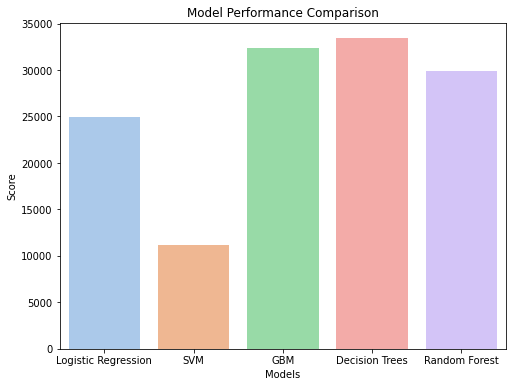

In [36]:
models = ['Logistic Regression', 'SVM', 'GBM', 'Decision Trees', 'Random Forest']
scores = [logit_score, svm_score, gbm_score, tree_score, rf_score]

# Create the barplot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=scores, palette='pastel')

# Add labels
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Score')


## Using Grid Search to improve Random Forest

In [37]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model
rf_model = RandomForestClassifier()

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [10, 50, 100, 200, 300],  # Example values, adjust as needed
    'max_depth': [None, 10, 20, 30],  # Example values, adjust as needed
    # Add other hyperparameters you want to tune
}

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Fit the random search to the training data
random_search.fit(X_train, y_train)

# Get the best parameters found by the random search
best_params = random_search.best_params_

# Initialize a new Random Forest model with the best parameters
optimized_rf_model = RandomForestClassifier(**best_params)

# Fit the optimized model to the training data
optimized_rf_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = optimized_rf_model.predict(X_test)

# Create a DataFrame with true labels and predictions
optimized_rf_results_df = pd.DataFrame({'True Labels': y_test, 'Predictions': predictions})

optimized_rf_results_df.head()


,True Labels,Predictions
32884,0.0,0.0
3169,0.0,0.0
32206,0.0,0.0
9403,0.0,0.0
14020,0.0,0.0


In [38]:

scores = []

# Iterate over each row in the DataFrame
for index, row in optimized_rf_results_df.iterrows():
    # Check if the prediction is correct
    if row['True Labels'] == 1 and row['Predictions'] == 1:
        # If correct, reward the model by 50 units
        score = 50
    elif row['True Labels'] == 0 and row['Predictions'] == 0:
        # If incorrect, penalize the model by 3 units
        score = 0
    else:
      score = -3

    # Append the score to the list
    scores.append(score)

# Add the scores list as a new column to the DataFrame
optimized_rf_results_df['Score'] = scores

# Display the updated DataFrame
optimized_rf_results_df

optimized_rf_score = optimized_rf_results_df['Score'].sum()
print("Optimized Random Forest Model Score:", optimized_rf_score)


Optimized Random Forest Model Score: 30146


## Using RandomizedSearch for GBM Model

In [39]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

# Initialize the GBM model
gbm_model = GradientBoostingClassifier()

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300],  # Example values, adjust as needed
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Example values, adjust as needed
    'max_depth': [3, 5, 7, 9],  # Example values, adjust as needed
    'min_samples_split': [2, 5, 10],  # Example values, adjust as needed
    'min_samples_leaf': [1, 2, 4],  # Example values, adjust as needed
    'subsample': [0.8, 0.9, 1.0],  # Example values, adjust as needed
}

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(estimator=gbm_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Fit the random search to the training data
random_search.fit(X_train, y_train)

# Get the best parameters found by the random search
best_params = random_search.best_params_

# Initialize a new GBM model with the best parameters
optimized_gbm_model = GradientBoostingClassifier(**best_params)

# Fit the optimized model to the training data
optimized_gbm_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = optimized_gbm_model.predict(X_test)

# Create a DataFrame with true labels and predictions
optimized_gbm_results_df = pd.DataFrame({'True Labels': y_test, 'Predictions': predictions})

optimized_gbm_results_df.head()


,True Labels,Predictions
32884,0.0,0.0
3169,0.0,0.0
32206,0.0,0.0
9403,0.0,0.0
14020,0.0,0.0


In [41]:
scores = []

# Iterate over each row in the DataFrame
for index, row in optimized_gbm_results_df.iterrows():
    # Check if the prediction is correct
    if row['True Labels'] == 1 and row['Predictions'] == 1:
        # If correct, reward the model by 50 units
        score = 50
    elif row['True Labels'] == 0 and row['Predictions'] == 0:
        # If incorrect, penalize the model by 3 units
        score = 0
    else:
      score = -3

    # Append the score to the list
    scores.append(score)

# Add the scores list as a new column to the DataFrame
optimized_gbm_results_df['Score'] = scores

# Display the updated DataFrame
optimized_gbm_results_df

optimized_gbm_score = optimized_gbm_results_df['Score'].sum()
print("Optimized Gradient Boosting Machine Score:", optimized_gbm_score)

Optimized Gradient Boosting Machine Score: 35056


## Scoring Summary (After Optimization):

/var/folders/v0/7r3ppc5x19s0nmby4drzy0wc0000gn/T/ipykernel_35968/746412701.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=scores, palette='pastel')


Text(0, 0.5, 'Score')

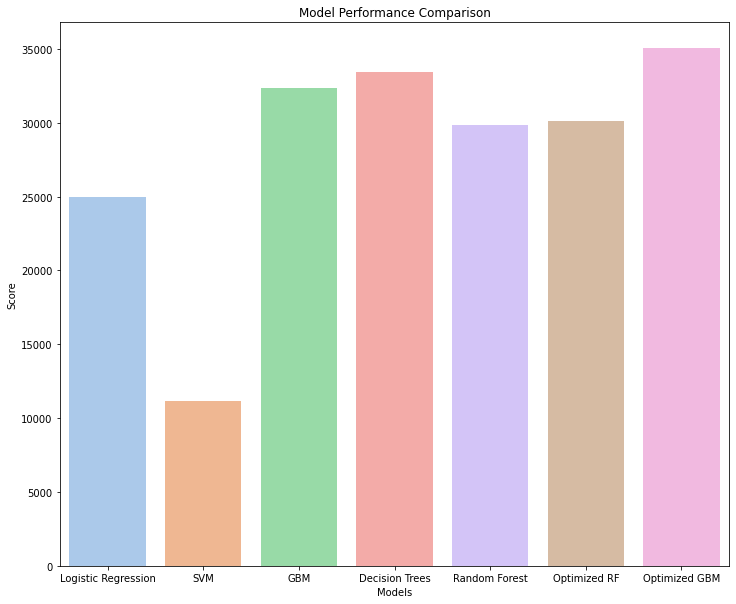

In [45]:
models = ['Logistic Regression', 'SVM', 'GBM', 'Decision Trees', 'Random Forest', 'Optimized RF',
         'Optimized GBM']
scores = [logit_score, svm_score, gbm_score, tree_score, rf_score, optimized_rf_score, optimized_gbm_score]

# Create the barplot using Seaborn
plt.figure(figsize=(12, 10))
sns.barplot(x=models, y=scores, palette='pastel')

# Add labels
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Score')


### Results:


After optimization, Gradient Boosting Machines turned out to be the best performing machine learning model, followed by Decision Trees